# Метапрограммирование и метаклассы

Когда, зачем и как использовать?

**Метапрограммирование** — это написание кода, который может создавать, изменять или анализировать другой код. Это метод программирования более высокого порядка, при котором операции выполняются над самими программами.

**Метаклассы** — это класс, который определяет поведение и свойства других классов, называемых подклассами. В Python класс type является метаклассом по умолчанию для всех классов. Метаклассы позволяют контролировать создание, изменение и удаление классов и их атрибутов.

"This tutorial as you will see in a second aims to combine every horrible insane thing you can possibly have at once."

David Beazley https://www.youtube.com/watch?v=sPiWg5jSoZI 


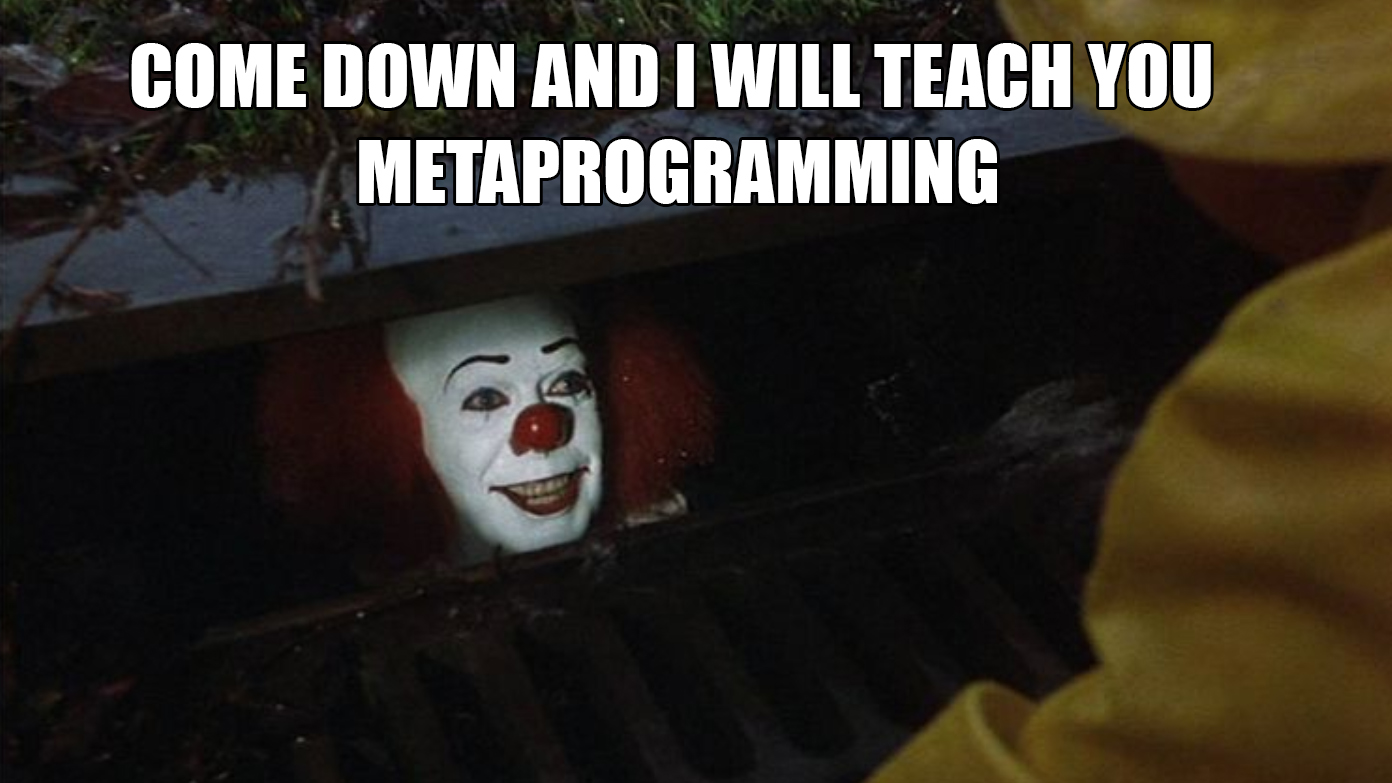

## Методы моделирования данных

Для произвольного объекта, когда нам требуется поведение --> мы пишем `__function__`, т. е. метод нижнего уровня или методы модели данных: https://docs.python.org/3/reference/datamodel.html

ПРИМЕЧАНИЕ: в Python вы всегда найдёте такой шаблон: <b>функция или синтаксис верхнего уровня и соответствующая функция `__метода__`</b>
```
x + y --> __add__
init x --> __init__
repr(x) --> __repr__
x() --> __call__
```

Методы модели данных: средство, с помощью которого вы можете реализовать протоколы, имеющие абстрактное значение в зависимости от самого объекта.
Например,
- len(полином) — это длина, наивысшая степень
- repr(полином) — это представление полинома

Существует функция верхнего уровня, которая позволяет нам вызывать этот протокол
то есть `__len__` или `__repr__`
где мы делегируем полномочия обратно самому протоколу, то есть
```
def __len__(self):
    return len(self.coeffs)
```

In [1]:
class Polynomial:
    def __init__(self, *coeffs):
        '''
        инициализирует объект класса Polynomial
        принимает произвольное количество аргументов (*coeffs) 
        и сохраняет их в атрибут self.coeffs
        позволяет создавать полиномы любой степени.
        '''
        self.coeffs = coeffs

    def __repr__(self):
        # представление полинома
        # форматирует коэффициенты многочлена в виде кортежа        
        return 'Polynomial(*{!r})'.format(self.coeffs)

    def __add__(self, other):
        '''
        переопределяет оператор сложения (+). 
        Он создает новый объект Polynomial, который является суммой двух входящих полиномов.
        '''
        return Polynomial(*(x + y for x, y in zip(self.coeffs, other.coeffs)))

    def __len__(self):
        # возвращает длину полинома, которая соответствует наивысшей степени
        return len(self.coeffs)

    def __call__(self):
        # в случае с полиномом вызов не имеет особого смысла
        pass

In [38]:
type(Polynomial(1, 2, 3, 4, 6, 7, 9))

__main__.Polynomial

type(name, bases, attrs) – возвращает новый тип данных или, если по-простому – новый класс, причем атрибут name станет атрибутом __name__ у возвращенного класса, bases – список классов-родителей будет доступен как __bases__, ну а attrs – dict-like объект, содержащий все атрибуты и методы класса, перейдет в __dict__. 

In [39]:
Polynomial(1, 2, 3, 4, 6, 7, 9).__class__

__main__.Polynomial

In [33]:
p1 = Polynomial(1, 2, 3)
p2 = Polynomial(3, 4, 3)

In [34]:
print(p1, p2)

Polynomial(*(1, 2, 3)) Polynomial(*(3, 4, 3))


In [35]:
print(len(p1))

3


In [36]:
print(p1+p2)

Polynomial(*(4, 6, 6))


## Генераторы

### Генераторы
ПРИМЕЧАНИЕ: В python вы всегда найдете этот шаблон: <b>функция или синтаксис верхнего уровня и соответствующая функция "__method__"</b>
``x() __call__ protocol``

### Добавление с генератором

In [40]:
def add1(x, y): # as a function
    return x + y

class Adder: # as a class
    def __call__(self, x, y):
        return x + y

add2 = Adder() # экземпляр класса, вызывает __call__

In [42]:
add1(634, 789)

1423

In [43]:
add2(634, 789)

1423

#### В чем разница между add1 и add2? 
Функционально они одинаковы. Но одна из них является функцией, а другой - классом.
<br><br>
Если бы вы хотели добавить какое-то поведение оператора:

In [44]:
class Adder:
    def __init__(self):
        self.z = 0

    def __call__(self, x, y):
        self.z += 1
        return x + y + self.z

то есть есть какой-то приятный синтаксис, а затем какая-то объектная модель, в которой все находится.

### Пример, требующий большого времени на вычисления
Функция, выполнение которой занимает много времени, например, запрос по сети
```
def load_data():
    rows = []
    while db.read():
        rows.append( ... )
```

In [45]:
from time import sleep # давайте имитируем чтение базы данных/какой-нибудь тяжелый сложный процесс

def compute():
    rv = []
    for i in range(10):
        sleep(.5)
        rv.append(i)
    return rv

In [46]:
compute()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

<b>Стремление против лени</b>

Когда вы запустите код выше, на выполнение уйдет 5 секунд.
- time: если нам нужно только первое значение, на выполнение все равно уйдет 5 секунд.
- memory: для этого потребуется 10 единиц памяти (10 целых чисел в списке), даже если мы будем заботиться только о первом элементе.

В этом и заключается понятие **оперативности** - независимо от того, что вас интересует в вычислении, оно всегда будет занимать весь объем памяти и времени. Он с нетерпением выдает вам весь результат, и вы ждете его целиком, прежде чем сможете что-либо обработать.
<br><br>
Это нежелательно:
- Если у вас 1 миллион записей, вам придется ждать все время, даже если вы хотите начать обработку элементов один за другим.
- Для обработки одного за другим вам потребуется гигабайт памяти.

In [47]:
# как класс

class Compute:
    def __class__(self):
        rv = []
        for i in range(10):
            sleep(.5)
            rv.append(i)
        return rv

compute = Compute()

In [48]:
compute

#### Итак, если нам нужен только один элемент за раз... где мы это видели?
Для циклов


Базовый цикл -> получать по одному элементу за раз, т.е. "для i в mylist`

Помните: <b>синтаксис или функция верхнего уровня -> метод с подчеркиваниями</b><br><br>
```
for x in xs:
    pass
```
Код выше выглядит примерно так:
```
x1 = iter(xs)           --> __iter__
while True:
    x = next(x1)        --> __next__
```
Таким образом, мы можем взять класс и добавить iter и next. 


In [49]:
class Compute:
    def __iter__(self):
        self.last = 0
        return self
    
    def __next__(self):
        rv = self.last
        self.last += 1
        
        if self.last > 10:
            raise StopIteration()
            
        sleep(.5)
        return rv

In [50]:
# Теперь мы каждый раз возвращаем только один элемент в списке
for val in Compute():
    print(val)

0
1
2
3
4
5
6
7
8
9


In [51]:
# Итак, давайте перепишем исходную вычислительную функцию, описанную выше.
def compute(): # ПРИМЕЧАНИЕ: функцию можно использовать повторно.
    for i in range(10):
        sleep(.5)
        yield(i)

In [52]:
compute()

<generator object compute at 0x00000175859CCEE0>

### Резюме
Возьмем первоначальную функцию и изменим её <b>автоматически</b> в коде.
<br><br> 

Это основная идея совместных подпрограмм и идея генераторов.<br>
чередование библиотечного и пользовательского кода -> генератор выдает и возвращает значение и ожидает пользовательский код, а затем генератор выдает библиотечный код...

Есть еще одна важная особенность генератора...
### Пример 2: API

In [ ]:
# Часто вижу API, которые выглядят примерно так

class Api:
    def run_this_first(self):
        first()
    def run_this_second(self):
        second()
    def run_this_last(self):
        last()

И в документации написано, что сначала обязательно запустить  first. затем second. затем last.
иначе все это сломается.
<br><br>
Но ничто не мешает вам делать это в неправильном порядке, т.е.:
``
Api.run_this_last()
Api.run_this_first()
```
В этом случае нам бы хотелось немного чередования.
ПРИМЕЧАНИЕ: если бы мы не хотели чередовать три шага в API, то у нас не было бы 3 отдельных функций. Мы бы просто написали все это вместе.

In [ ]:
def api():
    first()
    yield # контроль генератором (необязательно с указанием значения)
    second()
    yield
    last()


Генераторы - это механизм, с помощью которого вы можете создавать код, который чередуется с другим кодом, а также обеспечивает чередование (совместные процедуры, co-routines). обеспечивает последовательность выполнения.

## Декораторы

ПРИМЕЧАНИЕ: Функция является объектом, которым мы можем управлять во время выполнения.


В C и C++ у вас есть указатели на функции, но на самом деле это просто определяется компилятором, т.е. адреса памяти, куда помещать пакет битов.
В python все намного проще. Каждый объект имеет определенное время жизни во время выполнения. 

<b>Вы можете просмотреть его в памяти и посмотреть его состояние.</b>

In [60]:
def add(x, y=10, z=24):
    return x + y + z

In [61]:
add

<function __main__.add(x, y=10, z=24)>

In [62]:
add.__name__

'add'

In [63]:
add.__module__

'__main__'

In [64]:
add.__defaults__ # переменные по умолчанию

(10, 24)

`.__code__` дает доступ к объекту кода функции

`.co_code` - это атрибут объекта кода, содержащий фактический байткод функции

In [65]:
add.__code__.co_code

b'\x97\x00|\x00|\x01z\x00\x00\x00|\x02z\x00\x00\x00S\x00'

In [66]:
# преобразуйте указанные выше биты в эквивалент opcode.h функции 
from dis import dis
dis(add.__code__.co_code)

          0 RESUME                   0
          2 LOAD_FAST                0
          4 LOAD_FAST                1
          6 BINARY_OP                0 (+)
         10 LOAD_FAST                2
         12 BINARY_OP                0 (+)
         16 RETURN_VALUE


In [68]:
add.__code__.co_varnames # содержит имена всех локальных переменных функции

('x', 'y', 'z')

In [69]:
from inspect import getsource
getsource(add) # возвращает строку с исходным кодом объекта

'def add(x, y=10, z=24):\n    return x + y + z\n'

In [70]:
getsource(type) # ошибка, написано не на python

TypeError: <class 'type'> is a built-in class

#### Профилирование функции

In [71]:
# некоторый библиотечный код

def add(x, y=10):
    return x + y

def sub(x, y=10):
    return x - y

In [73]:
from time import time
before = time()
print('add(10)', add(10))
after = time()
print('Затраченное время:', after - before)

add(10) 20
Затраченное время: 0.0


ПРИМЕЧАНИЕ: Если бы в библиотеке было несколько функций, нужно было бы добавить функцию времени ко всем функциям!

#### Помните: все имеет некоторое представление во время выполнения.
Возможно, мы сможем написать функцию под названием timer, и тогда нам не нужно будет менять так много кода, т.е. просто вызывать функцию timer в пользовательском коде (инструкции для печати).

In [75]:
from time import time

def timer(func, x, y=10):
    before = time()
    rv = func(x, y)
    after = time()
    print('elapsed', after - before)
    return rv

def add(x, y=10):
    return x + y

print('add(10)', timer(add, 10))
print('add(10)', timer(add, "a", "b"))

elapsed 0.0
add(10) 20
elapsed 0.0
add(10) ab


Давайте расширим это, т.е. передадим функцию и обернем ее.<br>
ПРИМЕЧАНИЕ: Мы можем определять функции во время выполнения. Мы можем определять функции где угодно.
<br><br>
И нам вообще не нужно менять пользовательский код.
<br><br>
Все, что мы делаем, это создаем новую функцию, которая использует существующую функцию и добавляет в нее немного больше функциональности.
<br><br>
**Этот шаблон чего-то, вызывающего что-то = decorator.**

In [76]:
from time import time

def timer(func):
    def f(*args, **kwargs): # оболочка вокруг функции
        before = time()
        rv = func(*args, **kwargs)
        after = time()
        print('elapsed', after - before)
        return rv
    return f

<b>Вместо:</b>
```
def add(x, y=10):
    return x + y

add = timer(add)
```
<b>Делаем</b>
```
@timer
def add(x, y=10):
    return x + y

print('add(10)', add(10))
```

### Пример: Двойной декоратор

In [82]:
def ntimes(n): # внешняя функция, которая создает декоратор (программное поведение)
    def inner(f): # декоратор создает оболочку
        def wrapper(*args, **kwargs): # оболочка создает функцию
            for _ in range(n):
                print('Запущен(а) {.__name__}'.format(f))
                rv = f(*args, **kwargs)
            return rv
        return wrapper
    return inner

@ntimes(5)
def add(x, y=10):
    return x + y

In [81]:
add(10)

Запущен(а) add
Запущен(а) add
Запущен(а) add
Запущен(а) add
Запущен(а) add


20

## Контекстные менеджеры

Всегда есть какая-то идея настройки и переопределения (или удаления), которую вы хотите объединить.
```
with open('contextmanager.py') as f:
    pass
```
например, откройте файл `contextmanager.py`, сделайте что-нибудь, закройте файл.
Эта концепция особенно важна при записи/с использованием буферов ввода-вывода, поскольку вы хотите убедиться, что записываете данные на диск перед закрытием файла.

#### Пример: Таблицы

In [83]:
from sqlite3 import connect

In [84]:
with connect('test.db') as conn: # метод подключения в качестве контекстного менеджера
    cur = conn.cursor()
    cur.execute('create table points(x int, y int)')
    cur.execute('insert into points (x, y) values (1, 1)')
    cur.execute('insert into points (x, y) values (2, 1)')
    for row in cur.execute('select sum(x * y) from points'):
        print(row)
    cur.execute('drop table points')

(3,)


В приведенном выше примере подключение к базе данных осуществляется с помощью контекстного менеджера, т.е. мы открываем соединение, фиксируем некоторые инструкции, а затем закрываем соединение.
**Но** здесь используется другой контекстный менеджер -> _создать и удалить таблицу_ (_create and drop a table_)

ПРИМЕЧАНИЕ: Естественно, это можно было бы сделать с помощью транзакции, которая имеет правильную семантику, но для этого примера мы представим, что у нас нет такой возможности и нам нужно создать и удалить таблицу.

### Помните!
<b>всегда существует некоторый синтаксис или функция верхнего уровня и соответствующий  `__method__`, который их реализует.</b>
```
x + y --> __add__
init x --> __init__
repr(x) --> __repr__
x() --> __call__
```
Таким образом, контекстный менеджер - это, по сути, ...
```
x = contextmanager().__enter__()
try:
    pass
finally:
    x.__exit__()
```

In [86]:
class TempTable: # временная таблица как контекстный менеджер
    def __init__(self, cur):
        self.cur = cur
    def __enter__(self):
        self.cur.execute('create table points(x int, y int)')
    def __exit__(self, *args):
        self.cur.execute('drop table points')

with connect('test.db') as conn: # метод подключения в качестве контекстного менеджера
    cur = conn.cursor()
    with TempTable(cur):
        # При обращении к TempTable сначала реализуется метод протокола __enter__
        cur.execute('insert into points (x, y) values (1, 1)')
        cur.execute('insert into points (x, y) values (2, 1)')
        for row in cur.execute('select sum(x * y) from points'):
            print(row)
# при закрытии with отрабатывает метод протокола __exit__

(3,)


ПРИМЕЧАНИЕ: Контекстные менеджеры используют четкую и недвусмысленную метафору.<br>
Итак, давайте рассмотрим кое-что интересное, связанное с контекстным менеджером временных таблиц.

```
class TempTable:
    def __init__(self, cur):
        self.cur = cur
    def __enter__(self):
        self.cur.execute('create table points(x int, y int)')
    def __exit__(self, *args):
        self.cur.execute('drop table points')
```

<b>enter всегда должен вызываться перед exit</b> --> Используйте генератор!<br>
ПРИМЕЧАНИЕ: Генераторы принудительно устанавливают последовательность. Они представляют собой механизм, с помощью которого вы можете создавать код, который чередуется с другим кодом, а также обеспечивает принудительное чередование (совместные процедуры, co-routines).

#### Временная таблица в качестве генератора
- Нам нужен процесс, который создает таблицу, принимает некоторый пользовательский код и затем удаляет таблицу: КОНТЕКСТНЫЙ МЕНЕДЖЕР 
- Мы хотим обеспечить последовательность создания таблицы, выполнения некоторых инструкций и последующего удаления таблицы: ГЕНЕРАТОР
- Итак, мы хотим создать генератор и поместить его в контекстный менеджер!

In [85]:
def temptable(cur):
    cur.execute('create table points(x int, y int)')
    yield
    cur.execute('drop table points')

class contextmanager_custom:
    def __init__(self, cur):
        self.cur = cur
    def __enter__(self):
        self.gen = temptable(self.cur)
        next(self.gen)
    def __exit__(self, *args):
        next(self.gen, None)

with connect('test.db') as conn:
    cur = conn.cursor()
    with contextmanager_custom(cur):
        cur.execute('insert into points (x, y) values (1, 1)')
        cur.execute('insert into points (x, y) values (2, 1)')
        for row in cur.execute('select sum(x * y) from points'):
            print(row)

(3,)


#### Обобщение класса contextmanager
Класс context manager жестко запрограммирован, поэтому давайте сделаем его более обобщенным

In [ ]:
from contextlib import contextmanager

In [87]:
class contextmanager_custom:
    def __init__(self, gen):
        self.gen = gen
    def __call__(self, *args, **kwargs): # вызовите генератор с with args, kwargs
        self.args, self.kwargs = args, kwargs
        return self
    def __enter__(self): # выполните итерацию по генератору
        self.gen_inst = self.gen(*self.args, **self.kwargs)
        next(self.gen_inst)
    def __exit__(self, *args): # выключите генератор
        next(self.gen_inst, None)

@contextmanager_custom # оберните генератор в контекстный менеджер
def temptable(cur):
    cur.execute('create table points(x int, y int)')
    yield
    cur.execute('drop table points')
    
# temptable = contextmanager_custom(temptable)

with connect('test.db') as conn:
    cur = conn.cursor()
    with temptable(cur):
        cur.execute('insert into points (x, y) values (1, 1)')
        cur.execute('insert into points (x, y) values (2, 1)')
        for row in cur.execute('select sum(x * y) from points'):
            print(row)

(3,)


#### Контекстный менеджер уже написан!

In [89]:
from contextlib import contextmanager

@contextmanager
def temptable(cur):
    cur.execute('create table points(x int, y int)')
    try:
        yield
    finally:
        cur.execute('drop table points')

with connect('test.db') as conn: # метод connect также является контекстным менеджером
    cur = conn.cursor()
    with temptable(cur):
        cur.execute('insert into points (x, y) values (1, 1)')
        cur.execute('insert into points (x, y) values (2, 1)')
        for row in cur.execute('select sum(x * y) from points'):
            print(row)

(3,)


## Резюме:

Рассмотрели 3 механизма и их использование в метапрограммировании:
1. <b>контекстный менеджер</b>: 
    - настройка и удаление, когда необходимо их объединить. Обеспечивает удаление, если произошла настройка.
2. <b>генератор</b>: 
    - простой синтаксис, который обеспечивает последовательность и чередование
    - предотвращает ускоренную загрузку, т.е. требует длительных вычислений и разбивает их на части для обработки пользователем.

ПРИМЕЧАНИЕ: Контекстный менеджер требует последовательности и чередования, т.е. настройки, ожидания пользовательского кода, а затем отключения. т.е. генератора. Нам также нужно что-то, чтобы адаптировать генератор к модели данных, т.е. обернуть генератор в контекстный менеджер (декоратор!)
3. <b>декоратор</b>: преобразование (обертка) генератора в контекстный менеджер.


Код, в котором четко указано, когда и где следует использовать ту или иную функцию - это наш сформированный и указанный шаблон. У python есть механизм применения этого шаблона. 
**Никаких дополнительных механизмов или протоколов  - все прописано уже в языке python.**

ПРИМЕЧАНИЕ: В python вы всегда найдете этот шаблон:

функция или синтаксис верхнего уровня и соответствующая __method__ функция

# Практика работы с мета-объектами

In [91]:
class User:  
    def __init__(self, name):  
        self.name = name  

class SuperUser(User):  
    """Encapsulate domain logic to work with super users"""  
    group_name = 'admin'  

    @property  
    def login(self):  
        # логика дескриптора, __get__
        return f'{self.group_name}/{self.name}'.lower()

# Теперь создадим аналог класса SuperUser "динамически" 
CustomSuperUser = type(
    # Название класса
    'SuperUser',
    # Список классов, от которых новый класс наследуется
    (User, ),  
    # Атрибуты и методы нового класса в виде словаря
    {  
        '__doc__': 'Encapsulate domain logic to work with super users',  
        'group_name': 'admin',  
        'login': property(lambda self: f'{self.group_name}/{self.name}'.lower()),  
    }  
)  

assert SuperUser.__doc__ == CustomSuperUser.__doc__ # проверка, что все все хорошо
assert SuperUser('Vladimir').login == CustomSuperUser('Vladimir').login # проверка, что все все хорошо

In [121]:
class MetaClass(type):
    """
    Шаблон мета-класса
    Описание принимаемых параметров:

    mcs – объект метакласса, например <__main__.MetaClass>
    name – строка, имя класса, для которого используется 
      данный метакласс, например "User"
    bases – кортеж из классов-родителей, например (SomeMixin, AbstractUser)
    attrs – dict-like объект, хранит в себе значения атрибутов и методов класса
    cls – созданный класс, например <__main__.User>
    extra_kwargs – дополнительные keyword-аргументы переданные в сигнатуру класса
    args и kwargs – аргументы переданные в конструктор класса 
      при создании нового экземпляра
    """
    def __new__(mcs, name, bases, attrs, **extra_kwargs):
        return super().__new__(mcs, name, bases, attrs)  

    def __init__(cls, name, bases, attrs, **extra_kwargs):  
        super().__init__(cls)  

    @classmethod  
    def __prepare__(mcs, cls, bases, **extra_kwargs):  
        return super().__prepare__(mcs, cls, bases, **extra_kwargs)  

    def __call__(cls, *args, **kwargs):  
        return super().__call__(*args, **kwargs)

In [120]:
class User(metaclass=MetaClass):

    def __new__(cls, name):  
        return super().__new__(cls)  

    def __init__(self, name):  
        self.name = name
        
    def some_method():
        pass

In [119]:
user = User(name='Test')
user

1. Интерпретатор определяет и находит классы-родители для текущего класса (если они есть).
2. Интерпретатор определяет метакласс (MetaClass в нашем случае, шаблон).
3. Вызывается метод `MetaClass.__prepare__` – он должен возвратить dict-like объект, в который будут записаны атрибуты и методы класса. После этого объект будет передан в метод `MetaClass.__new__` через аргумент attrs. О практическом использовании этого метода мы поговорим немного позже в примерах.
4. Интерпретатор читает тело класса User и формирует параметры для передачи их в метакласс MetaClass.
5. Вызывается метод `MetaClass.__new__` – метод-коструктор, возвращает созданный объект класса. C аргументами name, bases и attrs мы уже встречались, когда передавали их в функцию type, а о параметре **extra_kwargs мы поговорим немного позже. Если тип аргумента attrs был изменен с помощью `__prepare__`, то его необходимо конвертировать в dict, прежде чем передать в вызов метода super().
6. Вызывается метод `MetaClass.__init__` – метод-инициализатор, с помощью которого в класс можно добавить дополнительные атрибуты и методы в объект класса. На практике используется в случаях, когда метаклассы наследуются от других метаклассов, в остальном все что можно сделать в `__init__`, лучше сделать в `__new__`. Например параметр `__slots__` можно задать только в методе `__new__`, записав его в объект attrs.
7. На этом шаге класс считается созданным.

# Большой пример метапрограммирования (Отладка и трейсинг вызовов)

In [123]:
from contextlib import contextmanager  
import logging # более предпочтительно, чем print
import time  
import wrapt  

@contextmanager  
def timing_context(operation_name):  
    """Этот контекст менеджер замеряет время выполнения произвольной операции"""
    start_time = time.time()  
    try:  
        yield  
    finally:  
        logging.info('Operation "%s" completed in %0.2f seconds', 
                          operation_name, time.time() - start_time)  

@wrapt.decorator  
def timing(func, instance, args, kwargs):
    """
    Замеряет время выполнения произвольной фукнции или метода.
    Здесь мы используем библиотеку https://wrapt.readthedocs.io/en/latest/
    чтобы безболезненно декорировать методы класса и статические методы
    """
    with timing_context(func.__name__):  
        return func(*args, **kwargs)  

class DebugMeta(type):   
    def __new__(mcs, name, bases, attrs):  
        for attr, method in attrs.items():  
            if not attr.startswith('_'):  
                # оборачиваем все методы декоратором            
                attrs[attr] = timing(method)  
        return super().__new__(mcs, name, bases, attrs)  

    def __call__(cls, *args, **kwargs):  
        with timing_context(f'{cls.__name__} instance creation'):  
            # замеряем время выполнения создания экземпляра
            return super().__call__(*args, **kwargs)

In [125]:
class User(metaclass=DebugMeta):  
    def __init__(self, name):  
        self.name = name  
        time.sleep(.7)  

    def login(self):  
        time.sleep(1)  

    def logout(self):  
        time.sleep(2)  

    @classmethod  
    def create(cls):  
        time.sleep(.5)  

user = User('Michael')  
user.login()  
user.logout()  
user.create()

# Вывод логгера
# INFO:__main__:Operation "User instance creation" completed in 0.70 seconds
# INFO:__main__:Operation "login" completed in 1.00 seconds
# INFO:__main__:Operation "logout" completed in 2.00 seconds
# INFO:__main__:Operation "create" completed in 0.50 seconds